In [1]:
''' !pip install torch
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib 
!pip install category-encoders '''

' !pip install torch\n!pip install numpy\n!pip install pandas\n!pip install seaborn\n!pip install matplotlib \n!pip install category-encoders '

In [1]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

from torch import nn
from torch.utils.data import DataLoader, Dataset

In [2]:
# CSV 파일 로드
df = pd.read_csv("archive/credit_card_transactions-ibm_v2.csv")
print(df.columns)
df.rename(columns = {'Use Chip':'Method', 'Merchant Name':'Name', 'Merchant City': 'City', 'Merchant State': 'State','Errors?':'Error', 'Is Fraud?':'Fraud'}, inplace = True)
df = df.drop(columns = ['Error', 'City', 'State', 'Year', 'Month', 'Day', 'Time'])
df = df.dropna()
df.head()

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?'],
      dtype='object')


,User,Card,Amount,Method,Name,Zip,MCC,Fraud
0,0,0,$134.09,Swipe Transaction,3527213246127876953,91750.0,5300,No
1,0,0,$38.48,Swipe Transaction,-727612092139916043,91754.0,5411,No
2,0,0,$120.34,Swipe Transaction,-727612092139916043,91754.0,5411,No
3,0,0,$128.95,Swipe Transaction,3414527459579106770,91754.0,5651,No
4,0,0,$104.71,Swipe Transaction,5817218446178736267,91750.0,5912,No


In [ ]:
''' sns.countplot(data = df, x = 'Method')
plt.title("Transaction Methods")
plt.show() '''

In [ ]:
sns.countplot(data = df, x = 'Fraud')
plt.title("Fraud Proportion")
plt.show()

In [4]:
# 특성과 타겟 확인 및 조정
df['Fraud'] = df['Fraud'].replace({'No': 0, "Yes": 1})

print(df.shape)
df = df[df['Method'] != 'Online Transaction']
df = df[(df['Zip'] != 'NaN') & (df['Zip'] != 'nan')]

import category_encoders as ce

df['Amount'] = df['Amount'].str.replace('$','').astype(float)
df['Name'] = df['Name'].astype(str)

for col in ['Method', 'Name']:
    if col in df.columns:
        be = ce.BinaryEncoder(drop_invariant=False)
        encoded_df = pd.DataFrame(be.fit_transform(df[col]), dtype ='int8')
        df = pd.concat([df, encoded_df], axis=1)
        df.drop([col], axis=1, inplace=True)

C:\Users\mef51\AppData\Local\Temp\ipykernel_12960\3217882066.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Fraud'] = df['Fraud'].replace({'No': 0, "Yes": 1})


(21508765, 8)


In [ ]:
df.head(150)

(21508765, 25)
Fraud: (4905, 25), Not Fraud: (4905, 25)
Total data size: (9810, 25)


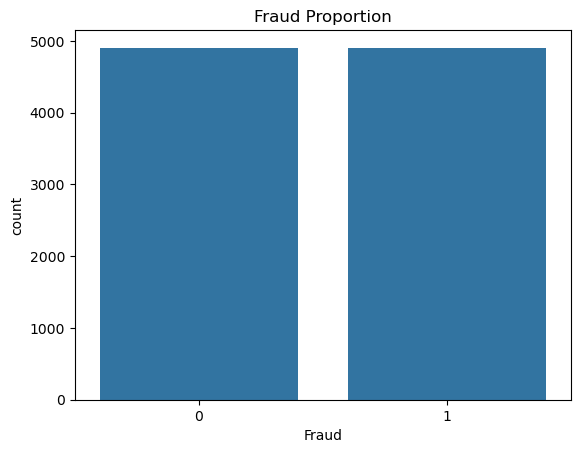

,User,Card,Amount,Zip,MCC,Fraud,Method_0,Method_1,Name_0,Name_1,...,Name_7,Name_8,Name_9,Name_10,Name_11,Name_12,Name_13,Name_14,Name_15,Name_16
19779611,1604,0,96.52,92220.0,4829,1,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1
20615385,1683,0,106.00,94702.0,3504,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
6437256,539,1,428.18,89148.0,3775,1,0,1,0,0,...,0,1,0,0,1,0,1,1,0,0
778,0,0,48.36,91755.0,5942,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3964,0,0,112.68,91750.0,5411,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1360,0,0,23.05,91752.0,7832,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
20014598,1622,1,3.94,79373.0,5411,1,1,0,0,0,...,0,0,1,1,0,0,0,1,1,1
2839,0,0,76.00,91750.0,5499,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,1
6650315,556,1,3.36,28366.0,4829,1,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1
2636943,220,3,157.92,46725.0,7922,1,0,1,0,0,...,1,1,1,1,0,0,1,0,0,1


In [7]:
# Dataset Size 조정
from sklearn.model_selection import train_test_split
print(df.shape)
df_yf = df[df['Fraud'] == 1]
df_nf = df[df['Fraud'] == 0].iloc[:df_yf.shape[0]]
print(f"Fraud: {df_yf.shape}, Not Fraud: {df_nf.shape}")

df = pd.concat([df_yf, df_nf])

print(f"Total data size: {df.shape}")
sns.countplot(data = df, x = 'Fraud')
plt.title("Fraud Proportion")
plt.show()

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_train.head(50)

In [25]:
# 신경망 정의

class NeuralNetwork(nn.Module):
  def __init__(self, N:int = 1000):
    super(NeuralNetwork, self).__init__()

    self.layer1 = nn.Linear(24, N)
    self.layer2 = nn.Linear(N, N)
    self.layer3 = nn.Linear(N, 1)

  def forward(self, x):
    x = torch.sigmoid(self.layer1(x))
    x = torch.sigmoid(self.layer2(x))
    x = torch.sigmoid(self.layer3(x))
    return x

In [27]:
!pip install torch-summary
from torchsummary import summary

model = NeuralNetwork()
summary(model, (1, 24))


Defaulting to user installation because normal site-packages is not writeable
Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1, 1000]             25,000
├─Linear: 1-2                            [-1, 1, 1000]             1,001,000
├─Linear: 1-3                            [-1, 1, 1]                1,001
Total params: 1,027,001
Trainable params: 1,027,001
Non-trainable params: 0
Total mult-adds (M): 1.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 3.92
Estimated Total Size (MB): 3.93


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1, 1000]             25,000
├─Linear: 1-2                            [-1, 1, 1000]             1,001,000
├─Linear: 1-3                            [-1, 1, 1]                1,001
Total params: 1,027,001
Trainable params: 1,027,001
Non-trainable params: 0
Total mult-adds (M): 1.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 3.92
Estimated Total Size (MB): 3.93

In [12]:
# 커스텀 Fraud 데이터셋 구성
class FraudDataset(Dataset):
    def __init__(self, dataframe = pd.DataFrame):
        self.df = dataframe
        self.len = dataframe.shape[0]
        self.dx = dataframe.drop(columns = ['Fraud'])
        self.dy = dataframe['Fraud']

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        #print(np.array(self.dx.iloc[idx,:]), type(np.array(self.dx.iloc[idx,:])))
        #print(self.dy.iloc[idx], type(self.dy.iloc[idx]))
        return np.array(self.dx.iloc[idx,:]), float(self.dy.iloc[idx])

In [15]:
print(torch.cuda.is_available())

False


In [29]:
# prompt: Get dataloader for the dataset then start training with MSE loss

# 데이터 로더 생성
train_dataset = FraudDataset(df_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 모델 초기화
model = NeuralNetwork()
criterion = nn.MSELoss() # MSE Loss 사용
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# 훈련 루프
num_epochs = 100
for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(data.float())
        #print("output = ", outputs, "\ntarget = ", target.float().unsqueeze(1))
        loss = (10**4)*criterion(outputs, target.float().unsqueeze(1))
        loss.backward()
        optimizer.step()

        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}')

print("Training finished.")

Epoch [1/100], Step [100/246], Loss: 1585.7333
Epoch [1/100], Step [200/246], Loss: 1495.4315
Epoch [2/100], Step [100/246], Loss: 965.0925
Epoch [2/100], Step [200/246], Loss: 695.4327
Epoch [3/100], Step [100/246], Loss: 456.9130
Epoch [3/100], Step [200/246], Loss: 330.3182
Epoch [4/100], Step [100/246], Loss: 170.7042
Epoch [4/100], Step [200/246], Loss: 181.2236
Epoch [5/100], Step [100/246], Loss: 413.5681
Epoch [5/100], Step [200/246], Loss: 244.4131
Epoch [6/100], Step [100/246], Loss: 163.8700
Epoch [6/100], Step [200/246], Loss: 497.4383
Epoch [7/100], Step [100/246], Loss: 177.3033
Epoch [7/100], Step [200/246], Loss: 381.6998
Epoch [8/100], Step [100/246], Loss: 784.8121
Epoch [8/100], Step [200/246], Loss: 201.6450
Epoch [9/100], Step [100/246], Loss: 330.3607
Epoch [9/100], Step [200/246], Loss: 660.6436
Epoch [10/100], Step [100/246], Loss: 224.1797
Epoch [10/100], Step [200/246], Loss: 183.2476
Epoch [11/100], Step [100/246], Loss: 28.1384
Epoch [11/100], Step [200/246]

In [31]:
threshold = 0.7

test_dataset = FraudDataset(df_test)
test_dataloader = DataLoader(test_dataset)

model.eval()

total = 0
correct = 0

with torch.no_grad():
    for data, target in test_dataloader:
        outputs = model(data.float())
        predicted = (outputs > threshold).int()
        total += int(target.size(0))
        correct += (predicted == target.unsqueeze(1)).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')

from sklearn.metrics import precision_score, recall_score, f1_score

all_targets = []
all_predictions = []

with torch.no_grad():
    for data, target in test_dataloader:
        outputs = model(data.float())
        predicted = (outputs > threshold).int()
        all_targets.extend(target.numpy().tolist())
        all_predictions.extend(predicted.numpy().tolist())

precision = precision_score(all_targets, all_predictions)
recall = recall_score(all_targets, all_predictions)
f1 = f1_score(all_targets, all_predictions)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Test Accuracy: 0.9755
Precision: 1.0000
Recall: 0.9514
F1 Score: 0.9751
